In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
df = pd.read_csv('balanced_video_fps_dataset_1.csv')
df.head()

,Connection_Speed (Mbps),Buffering_Rate (s),Video_Resolution,Video_FPS
0,23.240154,0.374095,360,24
1,42.914569,0.290750,720,30
2,89.188167,0.098546,1080,120
3,16.920892,0.625060,720,30
4,76.000925,0.077506,1080,60


Linear Regression RMSE: 0.1409
Linear Regression R²: 0.6804


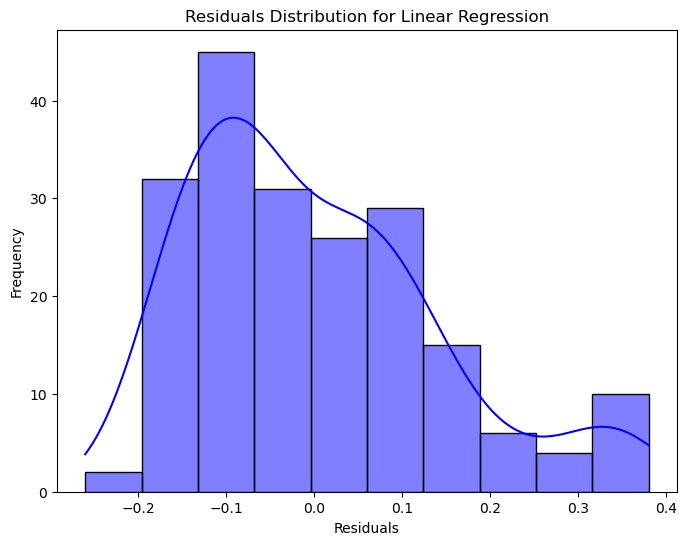

Random Forest RMSE: 0.0556
Random Forest R²: 0.9503


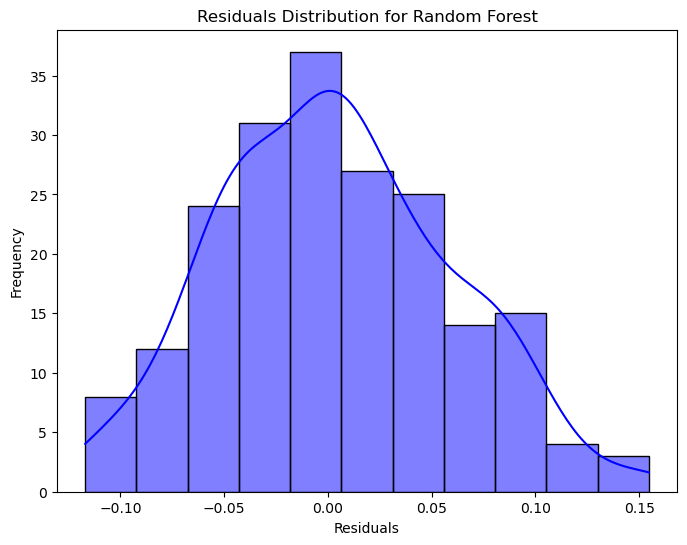

XGBoost RMSE: 0.0553
XGBoost R²: 0.9509


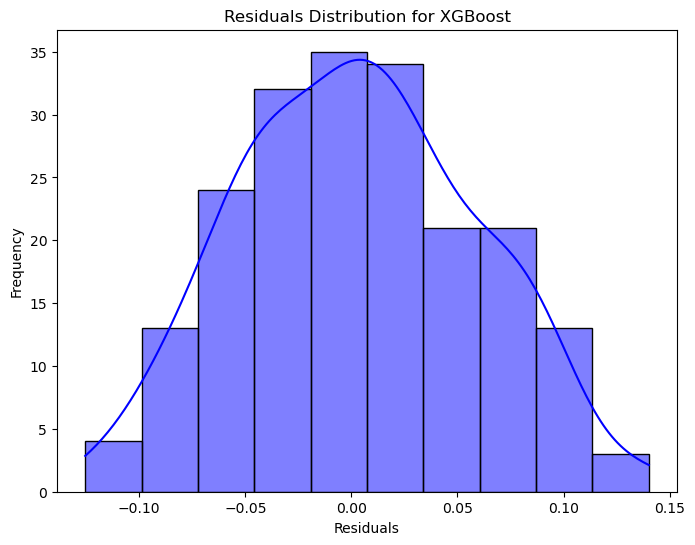

The best model (XGBoost) has been saved as 'best_model.pkl' with RMSE: 0.0553 and R²: 0.9509


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Preprocessing
# Encode the categorical column 'Video_Resolution'
label_encoder_resolution = LabelEncoder()
df['Video_Resolution'] = label_encoder_resolution.fit_transform(df['Video_Resolution'])

# Encode the target variable 'Video_FPS'
label_encoder_fps = LabelEncoder()
df['Video_FPS'] = label_encoder_fps.fit_transform(df['Video_FPS'])


joblib.dump(label_encoder_resolution, 'label_encoder_resolution.pkl')
joblib.dump(label_encoder_fps, 'label_encoder_fps.pkl')

# Features and Target
X = df[['Connection_Speed (Mbps)', 'Video_FPS', 'Video_Resolution']]
y = df[ 'Buffering_Rate (s)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(eval_metric='rmse')
}

best_model_name = None
best_model = None
best_rmse = float('inf')  # Start with a high RMSE for comparison
best_r2 = float('-inf')  # Start with a low R² for comparison

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model_name} RMSE: {rmse:.4f}")
    
    # Calculate R² (R-squared)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R²: {r2:.4f}")
    
    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue')
    plt.title(f"Residuals Distribution for {model_name}")
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    # Update the best model if current model has lower RMSE or higher R²
    if rmse < best_rmse:
        best_rmse = rmse
        best_model_name = model_name
        best_model = model
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = model_name
        best_model = model

# Save the best model
joblib.dump(best_model, 'buffering_Rate_model.pkl')
print(f"The best model ({best_model_name}) has been saved as 'best_model.pkl' with RMSE: {best_rmse:.4f} and R²: {best_r2:.4f}")


In [12]:
import joblib
import numpy as np

def predict_buffering_rate():
    try:
        model = joblib.load('buffering_Rate_model.pkl')
        label_encoder_resolution = joblib.load('label_encoder_resolution.pkl')
        label_encoder_fps = joblib.load('label_encoder_fps.pkl')
        
        connection_speed = float(input("Connection Speed (Mbps): "))
        resolution = int(input("Video Resolution (360/720/1080): "))
        print("\nAvailable FPS values: 24, 30, 60, 120")
        fps = int(input("Video FPS (24/30/60/120): "))
        
        if resolution not in [360, 720, 1080]:
            raise ValueError("Invalid resolution. Please choose from: 360, 720, 1080")
        
        if fps not in [24, 30, 60, 120]:
            raise ValueError("Invalid FPS. Please choose from: 24, 30, 60, 120")
        
        resolution_encoded = label_encoder_resolution.transform([resolution])[0]
        fps_encoded = label_encoder_fps.transform([fps])[0]
        
        input_data = np.array([[connection_speed, resolution_encoded, fps_encoded]])
        
        predicted_buffering = model.predict(input_data)[0]
        
        print(f"\nPredicted Buffering Rate: {predicted_buffering:.4f} seconds")
            
    except FileNotFoundError:
        print("Error: Model files not found.")
    except ValueError as ve:
        print(f"Error: {str(ve)}")
    except Exception as e:
        print(f"Error: {str(e)}")

predict_buffering_rate()

Connection Speed (Mbps):  21
Video Resolution (360/720/1080):  1080



Available FPS values: 24, 30, 60, 120


Video FPS (24/30/60/120):  24



Predicted Buffering Rate: 0.3507 seconds


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
